<a href="https://colab.research.google.com/github/adithyaprabhu007/machine_learning_algos/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [14]:
df=pd.read_csv("/content/iris.csv")

In [15]:
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.6,3.1,1.5,0.2,setosa
96,5.7,2.9,4.2,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [16]:
X=df.drop("species",axis=1)
y=df["species"]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
pip1=Pipeline(
    [
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
    ]
)

In [21]:
x_train_transformed = pip1.fit_transform(x_train)
x_test_transformed = pip1.transform(x_test)

In [23]:
label=LabelEncoder()
y_train_encoded=label.fit_transform(y_train)
y_test_encoded=label.transform(y_test)


In [24]:
y_train_encoded

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [25]:
logisticmodel=LogisticRegression(solver='liblinear',random_state=0)
logisticmodel.fit(x_train,y_train)
y_pred=logisticmodel.predict(x_test)

In [26]:
score=accuracy_score(y_test,y_pred)
print(score)

1.0


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

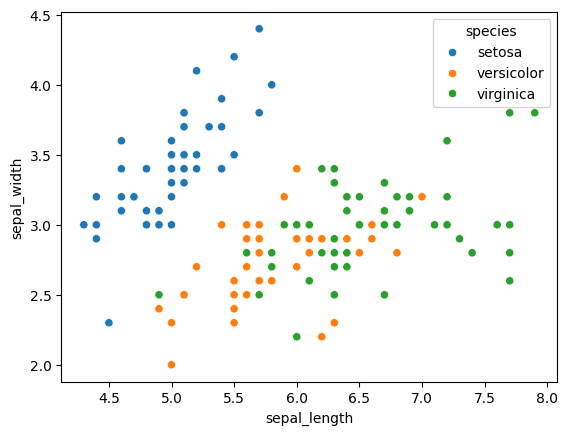

In [27]:
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=df)

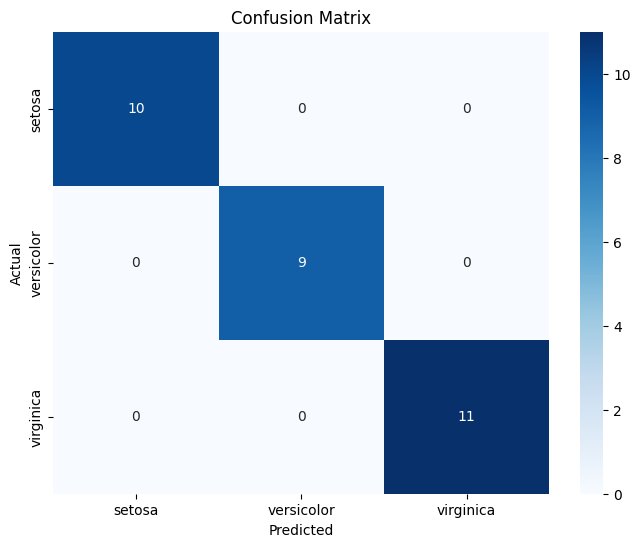


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logisticmodel.classes_, yticklabels=logisticmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


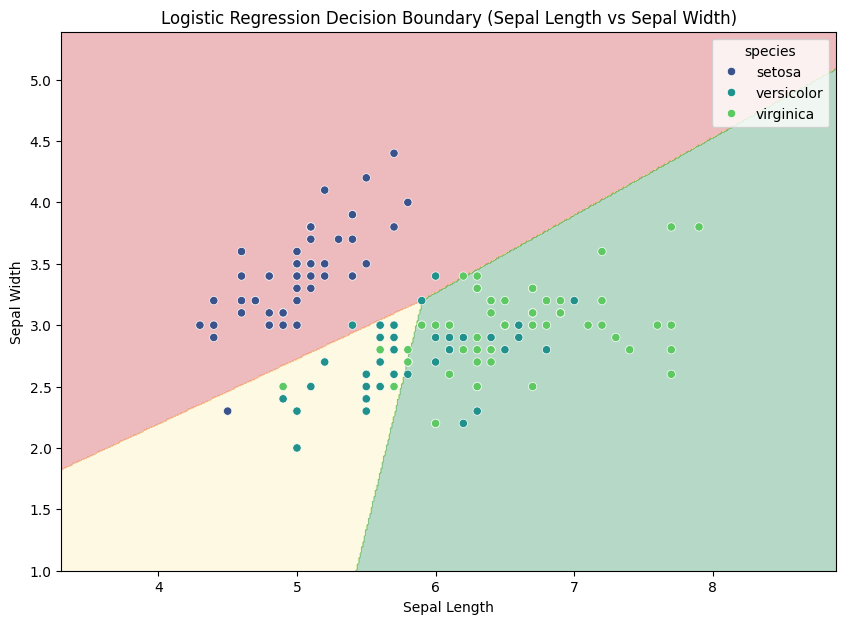

In [29]:
# Select two features for visualization
X_2_features = df[['sepal_length', 'sepal_width']]
y_encoded = label.fit_transform(y) # Ensure y is encoded

# Train a logistic regression model with 2 features
logisticmodel_2_features = LogisticRegression(solver='liblinear', random_state=0)
logisticmodel_2_features.fit(X_2_features, y_encoded)

# Create a meshgrid
x_min, x_max = X_2_features.iloc[:, 0].min() - 1, X_2_features.iloc[:, 0].max() + 1
y_min, y_max = X_2_features.iloc[:, 1].min() - 1, X_2_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the meshgrid
Z = logisticmodel_2_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)

# Plot the actual data points
sns.scatterplot(x=X_2_features.iloc[:, 0], y=X_2_features.iloc[:, 1], hue=df['species'],
                palette='viridis', legend='full')

plt.title('Logistic Regression Decision Boundary (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')